In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install numpy matplotlib opencv-python

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# 步骤1: 读取图片并转换为NumPy数组
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/cat.jpg')  # 用你的图片路径替换 'your_image_path.jpg'
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image

array([[[197, 192, 172],
        [210, 205, 185],
        [203, 198, 178],
        ...,
        [121, 111,  99],
        [122, 112, 100],
        [122, 112, 102]],

       [[202, 197, 177],
        [203, 198, 178],
        [200, 195, 175],
        ...,
        [ 76,  66,  54],
        [ 80,  70,  58],
        [ 82,  72,  62]],

       [[189, 184, 164],
        [187, 182, 162],
        [190, 185, 165],
        ...,
        [ 71,  61,  51],
        [ 72,  62,  52],
        [ 72,  62,  52]],

       ...,

       [[168, 166, 167],
        [169, 167, 168],
        [169, 167, 168],
        ...,
        [127, 119, 116],
        [123, 115, 112],
        [120, 112, 109]],

       [[171, 169, 170],
        [171, 169, 170],
        [171, 169, 170],
        ...,
        [125, 117, 114],
        [121, 113, 110],
        [122, 114, 111]],

       [[174, 172, 173],
        [174, 172, 173],
        [173, 171, 172],
        ...,
        [124, 116, 113],
        [124, 116, 113],
        [122, 114, 111]]

In [5]:
mean = np.mean(image, axis=(0,1))
variance = np.var(image, axis=(0,1))

In [6]:
epsilon = 1e-5
normalized_image = (image - mean) / np.sqrt(variance + epsilon)

In [7]:
# 初始化可学习的缩放（gamma）和平移（beta）参数
gamma = np.ones(3)
beta = np.zeros(3)

In [8]:
# 执行缩放和平移
scaled_and_shifted_image = gamma * normalized_image + beta

In [12]:
# # 由于图像像素值通常应为整数，我们进行适当的转换和裁剪
# 将像素值映射回[0, 255]范围
scaled_and_shifted_image = ((scaled_and_shifted_image - np.min(scaled_and_shifted_image)) /
                            (np.max(scaled_and_shifted_image) - np.min(scaled_and_shifted_image)) * 255).astype(np.uint8)

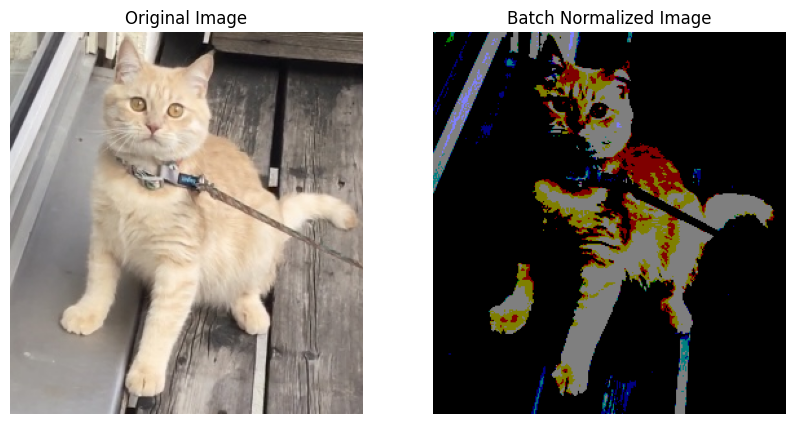

In [13]:
# 显示原图和处理后的图像
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Batch Normalized Image')
plt.imshow(scaled_and_shifted_image)
plt.axis('off')

plt.show()